### Seoul Covid-19 Occurance Analysis

In [17]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. 2020/06/30까지의 서울 코로나19 발생 데이터 불러오기

In [2]:
# 데이터 csv 파일 읽어오기
df = pd.read_csv("./seoul-covid19_6_30_.csv")
df.shape

(1321, 7)

In [3]:
# '연번' 컬럼으로 정렬하기
df = df.sort_values(by='연번', ascending=False)
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


#### 2. 시각화 도구 불러오기

In [15]:
# matplotlib.pyplot.rc로 한글폰트 설정
# plt.style.use로 'fivethirtyeight' 스타일 사용
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.style.use("fivethirtyeight")

#### 3. 확진일

In [7]:
# '확진일' 빈도수 확인
df['확진일'].value_counts()

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
         ..
4.20.     1
4.19.     1
4.18.     1
4.15.     1
1.24.     1
Name: 확진일, Length: 131, dtype: int64

In [8]:
# '확진일' 컬럼의 데이터가 오브젝트 형식
# datetime 형식으로 변환 필요
# 연도가 없으므로 2020년 임의로 추가
df['확진일자'] = pd.to_datetime('2020-' + df['확진일'].str.replace(".", "-"))
df[['확진일', '확진일자']].head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18888\636754021.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['확진일자'] = pd.to_datetime('2020-' + df['확진일'].str.replace(".", "-"))


,확진일,확진일자
0,6.30.,2020-06-30
1,6.30.,2020-06-30
2,6.30.,2020-06-30
3,6.30.,2020-06-30
4,6.30.,2020-06-30


In [9]:
# 월만 추출
df['월'] = df["확진일자"].dt.month
df[['확진일', '확진일자', '월']].head()

,확진일,확진일자,월
0,6.30.,2020-06-30,6
1,6.30.,2020-06-30,6
2,6.30.,2020-06-30,6
3,6.30.,2020-06-30,6
4,6.30.,2020-06-30,6


In [10]:
# 2020년 몇번째 주인지 추출
df['주'] = df['확진일자'].dt.week
df[['확진일', '확진일자', '월', '주']].head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18888\467928631.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['주'] = df['확진일자'].dt.week


,확진일,확진일자,월,주
0,6.30.,2020-06-30,6,27
1,6.30.,2020-06-30,6,27
2,6.30.,2020-06-30,6,27
3,6.30.,2020-06-30,6,27
4,6.30.,2020-06-30,6,27


##### 3.1 선그래프 그리기

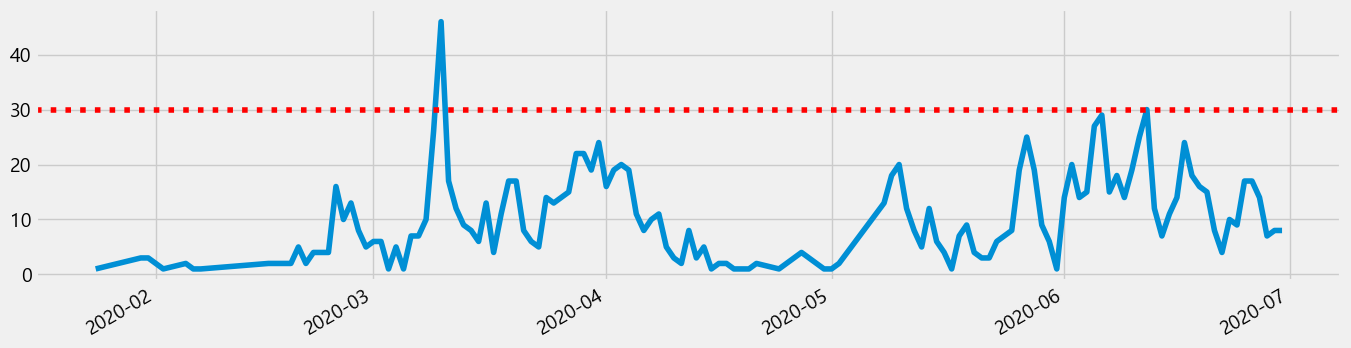

In [21]:
# 확진일자 선그래프
df["확진일자"].value_counts().sort_index().plot(figsize=(15, 4))
plt.axhline(30, color="red", linestyle=":")

##### 3.2 선그래프에 값 표시하기

In [31]:
# 일자별 확진자수 선그래프
# 연도 모두 2020년이므로 월, 일만 표시되도록 컬럼 추가
df["월일"] = df["확진일자"].astype(str).map(lambda x: x[5:])
day_count = df["월일"].value_counts().sort_index()
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
06-26    17
06-27    14
06-28     7
06-29     8
06-30     8
Name: 월일, Length: 130, dtype: int64

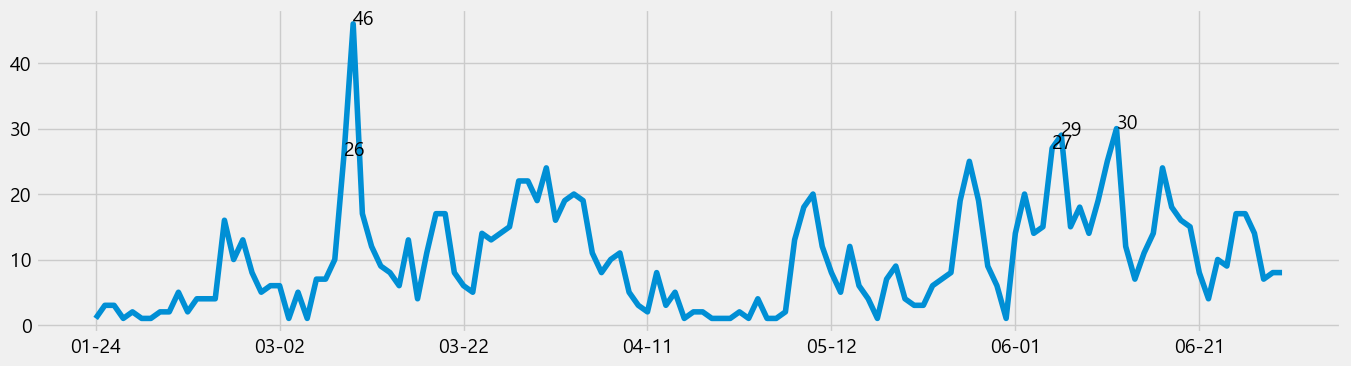

In [36]:
# 확진 수가 25명 초과인 경우만 텍스트 표시
g = day_count.plot(figsize=(15, 4))
for i in range(len(day_count)):
    if day_count.iloc[i] > 25:
        g.text(x=i, y=day_count.iloc[i], s=day_count.iloc[i])

##### 3.3 확진자가 가장 많이 나온 날

In [40]:
# describe로 일자별 확진자수 요약
day_count.describe()

count    130.000000
mean      10.161538
std        7.917015
min        1.000000
25%        4.000000
50%        8.000000
75%       15.000000
max       46.000000
Name: 월일, dtype: float64

In [41]:
# 확진자가 가장 많은 날
day_count[day_count == day_count.max()]

03-10    46
Name: 월일, dtype: int64

In [44]:
# 확진자가 가장 많은 날의 발생 이력
df[df["월일"] == "03-10"].head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1119,202,7567,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1120,201,7711,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1121,200,7555,3.10.,구로구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1122,199,7725,3.10.,양천구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1123,198,7539,3.10.,양천구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10


##### 3.4 막대그래프 그리기

<AxesSubplot:>

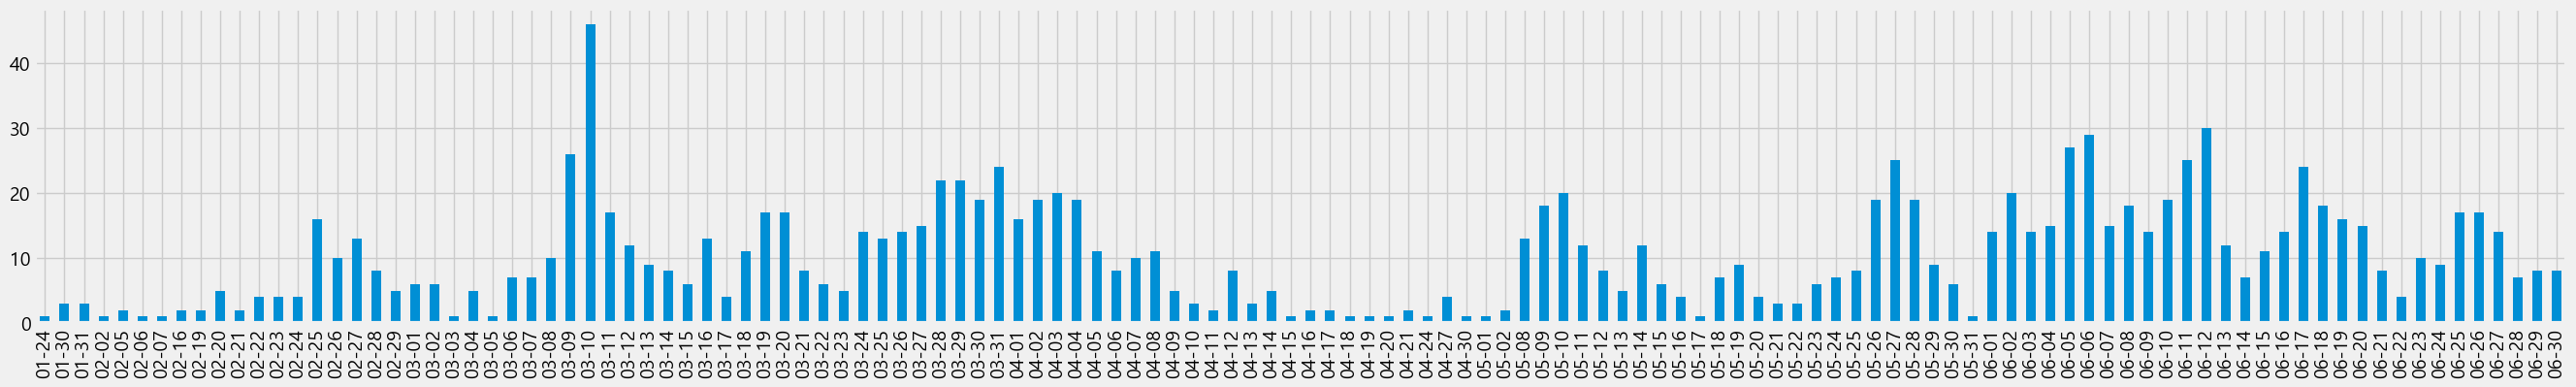

In [46]:
# 확진일자 막대그래프
day_count.plot.bar(figsize=(30, 4))

##### 3.5 최근 데이터만 슬라이싱으로 나눠 그리기

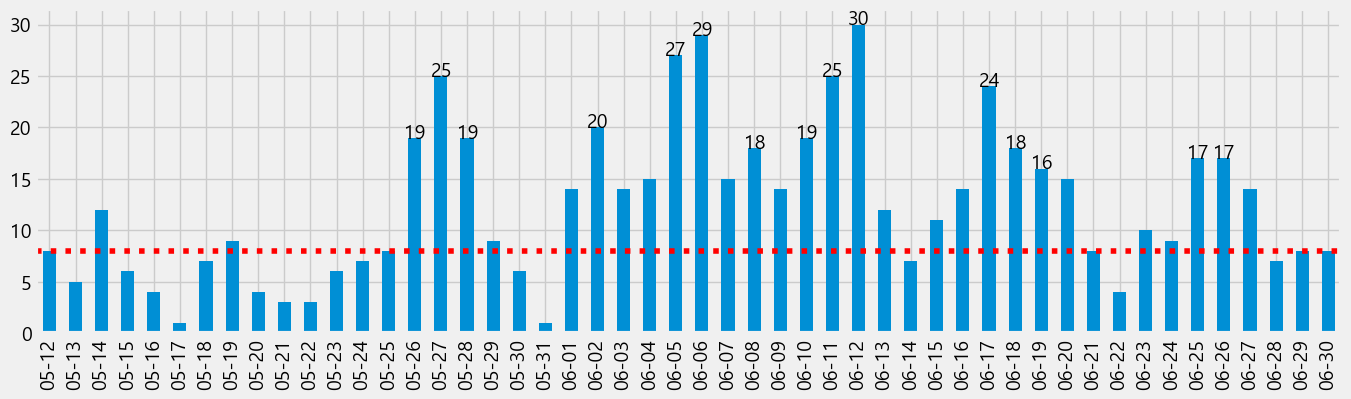

In [60]:
# 최근 데이터 슬라이싱하여 그리기
g = day_count[-50:].plot.bar(figsize=(15, 4))
g.axhline(day_count.median(), color="red", linestyle=":")

for i in range(50):
    if day_count[-50:].iloc[i] > 15:
        g.text(x=i-0.4, y=day_count[-50:].iloc[i], s=day_count[-50:].iloc[i])    

##### 3.6 월별 확진자수 그리기

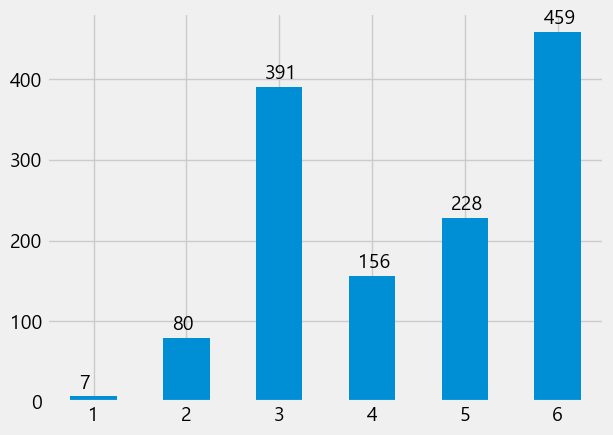

In [80]:
# 월별 확진자 빈도수 시각화
month_count = df["월"].value_counts().sort_index()
g = month_count.plot.bar(rot=0)
for i in range(len(month_count)):
    g.text(x=i-0.15, y=month_count.iloc[i]+10, s=month_count.iloc[i])

##### 3.7 주별 확진자수 그리기

<AxesSubplot:>

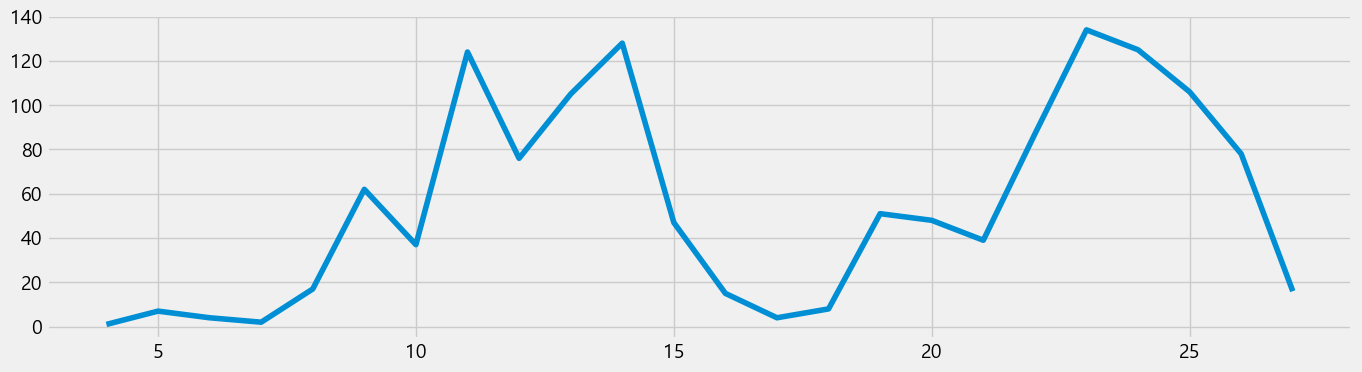

In [84]:
# 주별 확진자수 그래프 
week_case = df["주"].value_counts().sort_index()
week_case.plot(figsize=(15, 4))

<AxesSubplot:>

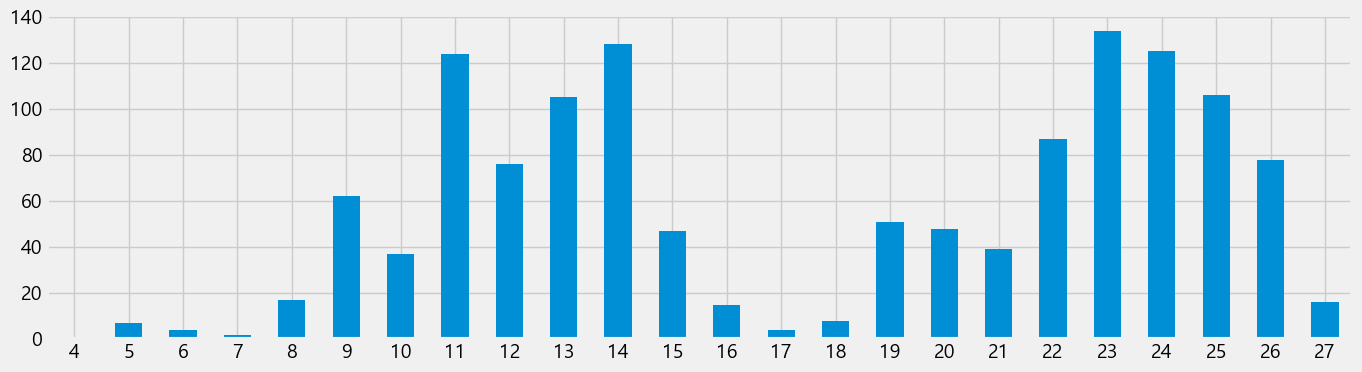

In [86]:
# 주별 확진자수 막대그래프
week_case.plot.bar(figsize=(15, 4), rot=0)

##### 3.8 월, 주 함께 그리기

In [92]:
# groupby로 "월", "주" 그룹화하여 확진자수 계산
month_week_count = df.groupby(["월", "주"])["연번"].count()
month_week_count

월  주 
1  4       1
   5       6
2  5       1
   6       4
   7       2
   8      17
   9      56
3  9       6
   10     37
   11    124
   12     76
   13    105
   14     43
4  14     85
   15     47
   16     15
   17      4
   18      5
5  18      3
   19     51
   20     48
   21     39
   22     87
6  23    134
   24    125
   25    106
   26     78
   27     16
Name: 연번, dtype: int64

<AxesSubplot:xlabel='월,주'>

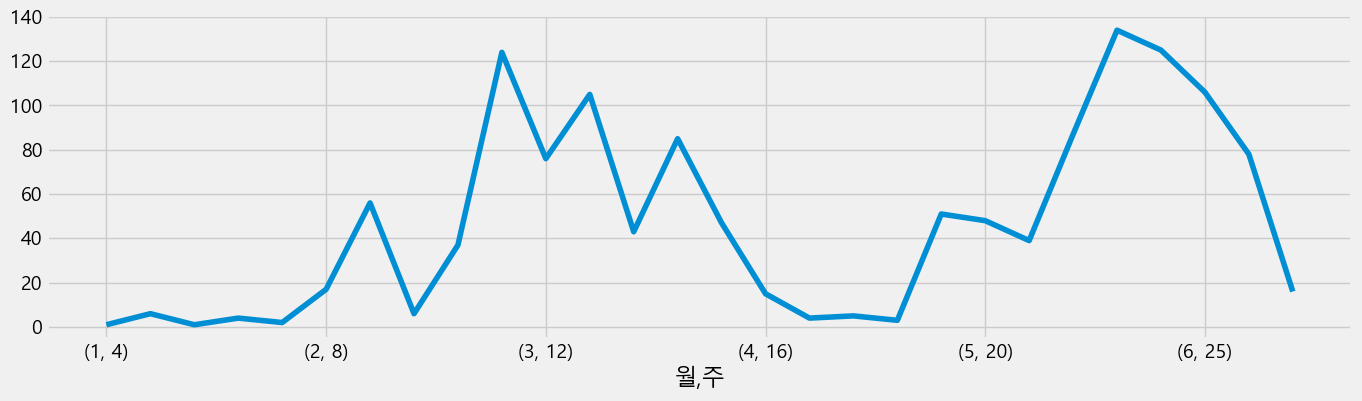

In [94]:
# ["월", "주" ] 그래프
month_week_count.plot(figsize=(15, 4))

<AxesSubplot:xlabel='월,주'>

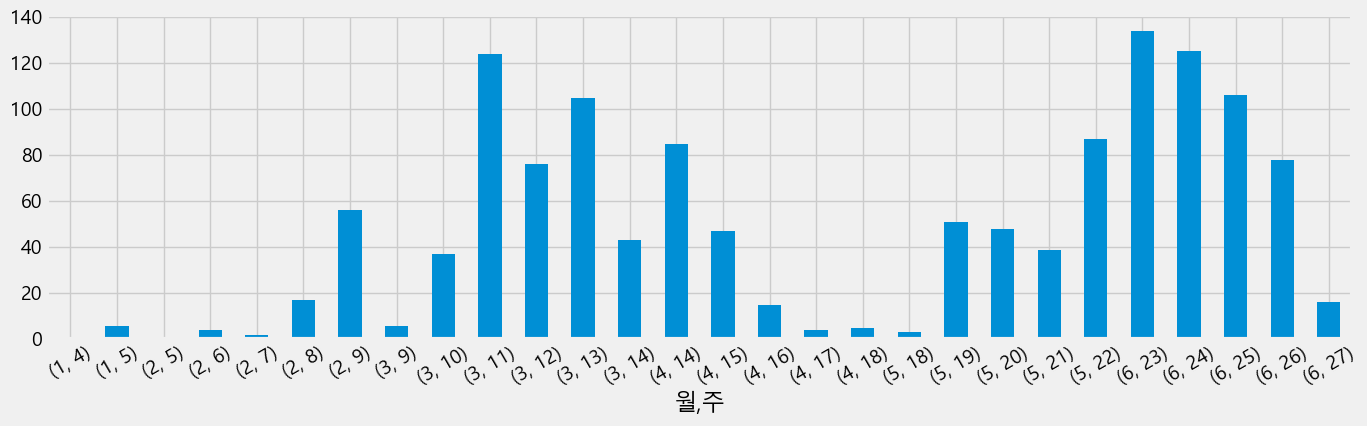

In [95]:
# ["월", "주"] 막대그래프
month_week_count.plot.bar(figsize=(15, 4), rot=30)